In [1]:
import cvxopt as cvx

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# 1

from cvxopt import matrix, solvers

A = matrix([ [-1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
            [0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
            [0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 1.0] ])
b = matrix([ 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 5.0 ])
c = matrix([ 1.0, 1.0, -1.0 ])

sol=solvers.lp(c,A,b)

print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  1.4000e+00 -1.6200e+01  1e+01  0e+00  2e+00  1e+00
 1:  3.1572e-01 -3.2626e+00  2e+00  2e-16  3e-01  2e-01
 2: -1.8542e+00 -2.9102e+00  9e-01  4e-16  1e-01  1e-01
 3: -1.9983e+00 -2.0098e+00  9e-03  1e-16  1e-03  1e-03
 4: -2.0000e+00 -2.0001e+00  9e-05  1e-16  1e-05  1e-05
 5: -2.0000e+00 -2.0000e+00  9e-07  3e-16  1e-07  1e-07
 6: -2.0000e+00 -2.0000e+00  9e-09  2e-16  1e-09  1e-09
Optimal solution found.
[ 1.95e-10]
[ 1.95e-10]
[ 2.00e+00]



In [4]:
# 2 Q1

def is_pd_matrix(x1, x2, x3):
    m = np.matrix([[x1, x3],
                  [x3, x2]])
    return np.all(np.linalg.eigvals(m) > 0)

start = -1
size = 1
step = 0.1
Q1 = []
Q2 = []
Q3 = []

x1 = start
while(x1 <= size):
    x2 = start
    while(x2 <= size):
        x3 = start
        while(x3 <= size):
            if is_pd_matrix(x1, x2, x3):
                Q1.append(x1)
                Q2.append(x2)
                Q3.append(x3) 
            x3 += step
        x2 += step
    x1 += step    


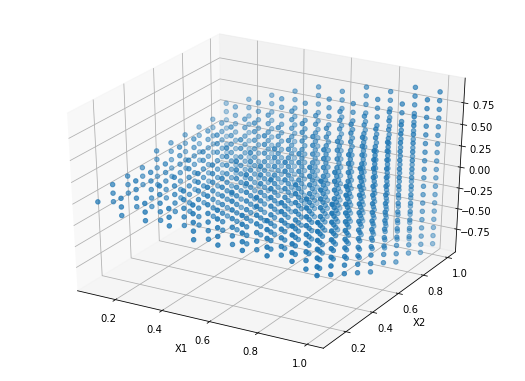

In [5]:
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(Q1, Q2, Q3)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
# Q2

def is_pd_q2(x1, x2, x3):
    m1 = np.matrix([[x1-0.5, x3],
                  [x3, x2-0.5]])
    
    m2 = np.matrix([[x1 -1,  x3],
                  [x3, x2 - 1]])
    
    return (np.all(np.linalg.eigvals(m1) > 0) and np.all(np.linalg.eigvals(m2) < 0))

size = 1
step = 0.05
Q1 = []
Q2 = []
Q3 = []

x1 = -1
while(x1 <= size):
    x2 = -1
    while(x2 <= size):
        x3 = -1
        while(x3 <= size):
            if is_pd_q2(x1, x2, x3):
                Q1.append(x1)
                Q2.append(x2)
                Q3.append(x3) 
            x3 += step
        x2 += step
    x1 += step    

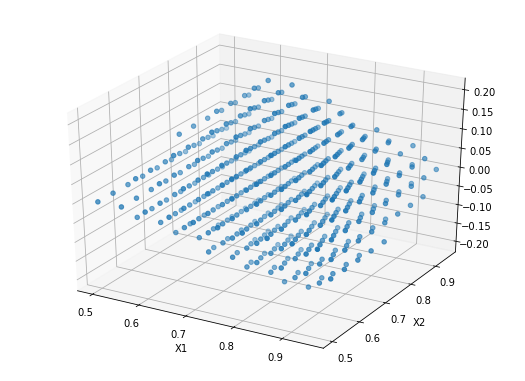

In [7]:
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(Q1, Q2, Q3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [8]:
G = [ 
    matrix([
        [-1., 0., 0., 0.],
        [0., 0., 0., -1.],
        [0., -1., -1., 0.]
]),
    matrix([
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 1., 0.]
    ])]

h = [
    matrix([
        [-0.5, 0.],
        [0., -0.5]
    ]),
    matrix([
        [1., 0.],
        [0., 1.]
    ])
]

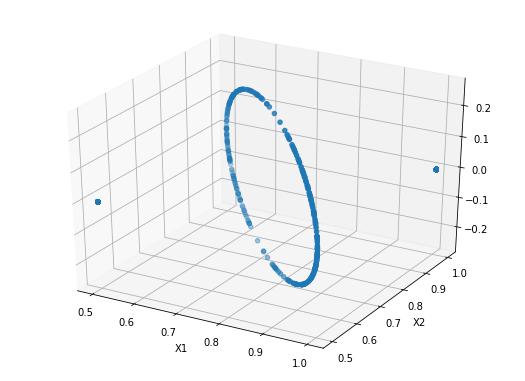

In [11]:
solvers.options['show_progress'] = False

px1 = []
px2 = []
px3 = []
for i in range(500):
    # generate 2x2 C
    c1 = np.random.rand() *10 -5
    c2 = np.random.rand() *10 -5
    c3 = np.random.rand() *10 -5
    c = matrix([c1, c2, c3])
    # get solver
    sol = solvers.sdp(c, Gs=G, hs=h)
    # add point
    point = sol['x']
    px1.append(point[0])
    px2.append(point[1])
    px3.append(point[2])

# plot
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(px1, px2, px3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
# relaxation

c = matrix([-2.0, -3.0])
A = matrix([
    [2.0/9, 1.0/7],
    [0.25, 1.0/3]
])
b = matrix([1.0, 1.0])

sol=solvers.lp(c,A,b)
print(sol['x'])

# at each step we are adding one more constraint - row to A and b

Optimal solution found.
[ 2.17e+00]
[ 2.07e+00]



[[-2.103145454150572, 1.483370372923437], [-2.1071068904961288, 1.483943282134609], [-2.1080231148231627, 1.483370372923437]]
10


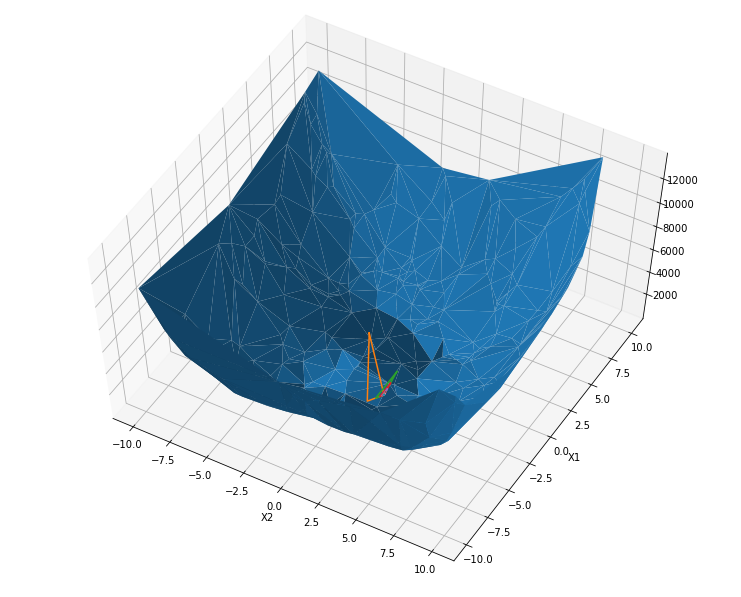

In [195]:
# Nelder-Mead method

def Himmelblau(point):
    x = point[0]
    y = point[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def dist(s1, s2):
    sum = 0.
    for i in range(3):
        sum += np.sqrt( (s1[i][0] - s2[i][0])**2 + (s1[i][1] - s2[i][1])**2 )
    return sum

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
xx = []
yy = []
zz = []
for i in range(300):
    xx.append(np.random.rand() *20 -10)
    yy.append(np.random.rand() *20 -10)
    zz.append(Himmelblau([xx[i], yy[i]]))
ax.plot_trisurf(yy, xx, zz)

def plot_simplex(simplex):
    x0 = simplex[0]
    x1 = simplex[1]
    x2 = simplex[2]
    f = [Himmelblau(s) for s in simplex]
    ax.plot([x0[1], x1[1], x2[1], x0[1]],
            [x0[0], x1[0], x2[0], x0[0]],
             [f[0], f[1], f[2], f[0] ])

alpha = 1.
beta = 0.5
gamma = 2.
epsilent = 0.01

simplex = [ 
    [np.random.rand() *10 -5, np.random.rand() *10 -5],
    [np.random.rand() *10 -5, np.random.rand() *10 -5],
    [np.random.rand() *10 -5, np.random.rand() *10 -5]
          ]
simplex_old = simplex.copy()

f = [Himmelblau(s) for s in simplex]

count = 0
too_large = True
while(count < 100 and too_large):
    plot_simplex(simplex)
    
    xh = simplex[f.index(max(f))]
    fh = Himmelblau(xh)
    xl = simplex[f.index(min(f))]
    fl = Himmelblau(xl)
    xg = simplex[3 - f.index(max(f)) - f.index(min(f))]    
    fg = Himmelblau(xg)
    xc = [xl[0]/2 + xg[0]/2, xl[1]/2 + xg[1]/2]    
    xr = [(1+alpha)*xc[0] + alpha*xh[0] , (1+alpha)*xc[1] + alpha*xh[1]]
    fr = Himmelblau(xr)
    
    if(fr < fl):
        xe = [(1-gamma)*xc[0] + gamma*xr[0] , (1-gamma)*xc[1] + gamma*xr[1]]
        fe = Himmelblau(xe)
        if(fe < fr):
            simplex[simplex.index(xh)] = xe
        else:
            simplex[simplex.index(xh)] = xr
    else:
        if(fr < fg):
            simplex[simplex.index(xh)] = xr
        else:
            if(fr < fh):
                temp = xr
                simplex[simplex.index(xh)] = temp
                xr = xh
                xh = temp
                temp = fr
                fr = fh
                fh = temp
            # simplex comression
            xs = [beta*xh[0] + (1-beta)*xc[0] , beta*xh[1] + (1-beta)*xc[1]]
            fs = Himmelblau(xs)
            if(fs < fh):
                simplex[simplex.index(xh)] = xs
            else:
                simplex[simplex.index(xh)] = [xl[0] + (xh[0] - xl[0])/2 , xl[1] + (xh[1] - xl[1])/2]
                simplex[simplex.index(xg)] = [xl[0] + (xg[0] - xl[0])/2 , xl[1] + (xh[1] - xl[1])/2]
            
    if (dist(simplex, simplex_old) < epsilent):
        too_large = False
    simplex_old = simplex.copy()
    count += 1

print(simplex)    
print(count)
plt.xlabel('X2')
plt.ylabel('X1')
ax.view_init(elev=60.)
plt.show()

[[-4.20862604682873, -0.9245399173202491], [-3.4723485008479757, 0.9876568464856028], [-4.944597625620007, -2.8517343028030098]]
9


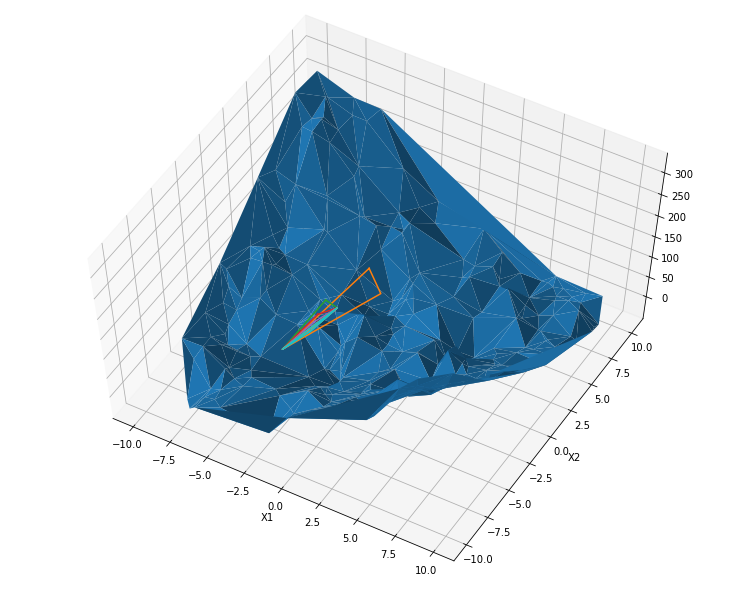

In [194]:
def Bird(point):
    x = point[0]
    y = point[1]
    return np.sin(y) * np.e**((1-np.cos(y))**2) + np.cos(x) * np.e**((1-np.sin(y))**2) + (x-y)**2

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
xx = []
yy = []
zz = []
for i in range(300):
    xx.append(np.random.rand() *20 -10)
    yy.append(np.random.rand() *20 -10)
    zz.append(Bird([xx[i], yy[i]]))
ax.plot_trisurf(yy, xx, zz)

def plot_simplex_on_bird(simplex):
    x0 = simplex[0]
    x1 = simplex[1]
    x2 = simplex[2]
    f = [Bird(s) for s in simplex]
    ax.plot([x0[0], x1[0], x2[0], x0[0]],
            [x0[1], x1[1], x2[1], x0[1]],
             [f[0], f[1], f[2], f[0] ])

simplex = [ 
    [np.random.rand() *10 -5, np.random.rand() *10 -5],
    [np.random.rand() *10 -5, np.random.rand() *10 -5],
    [np.random.rand() *10 -5, np.random.rand() *10 -5]
          ]
simplex_old = simplex.copy()

f = [Bird(s) for s in simplex]

count = 0
too_large = True
while(count < 100 and too_large):
    plot_simplex_on_bird(simplex)
    
    xh = simplex[f.index(max(f))]
    fh = Bird(xh)
    xl = simplex[f.index(min(f))]
    fl = Bird(xl)
    xg = simplex[3 - f.index(max(f)) - f.index(min(f))]    
    fg = Bird(xg)
    xc = [xl[0]/2 + xg[0]/2, xl[1]/2 + xg[1]/2]    
    xr = [(1+alpha)*xc[0] + alpha*xh[0] , (1+alpha)*xc[1] + alpha*xh[1]]
    fr = Bird(xr)
    
    if(fr < fl):
        xe = [(1-gamma)*xc[0] + gamma*xr[0] , (1-gamma)*xc[1] + gamma*xr[1]]
        fe = Bird(xe)
        if(fe < fr):
            simplex[simplex.index(xh)] = xe
        else:
            simplex[simplex.index(xh)] = xr
    else:
        if(fr < fg):
            simplex[simplex.index(xh)] = xr
        else:
            if(fr < fh):
                temp = xr
                simplex[simplex.index(xh)] = temp
                xr = xh
                xh = temp
                temp = fr
                fr = fh
                fh = temp
            # simplex comression
            xs = [beta*xh[0] + (1-beta)*xc[0] , beta*xh[1] + (1-beta)*xc[1]]
            fs = Bird(xs)
            if(fs < fh):
                simplex[simplex.index(xh)] = xs
            else:
                simplex[simplex.index(xh)] = [xl[0] + (xh[0] - xl[0])/2 , xl[1] + (xh[1] - xl[1])/2]
                simplex[simplex.index(xg)] = [xl[0] + (xg[0] - xl[0])/2 , xl[1] + (xh[1] - xl[1])/2]
            
    if (dist(simplex, simplex_old) < epsilent):
        too_large = False
    simplex_old = simplex.copy()
    count += 1

print(simplex)    
print(count)
plt.xlabel('X1')
plt.ylabel('X2')
ax.view_init(elev=60.)
plt.show()